<a href="https://colab.research.google.com/github/KhudV/MML/blob/main/Lab6_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения



##### Студент:  Худицкий Василий
##### Группа:   НКНбд-01-19

## Москва 2022
***

### Вариант №3

1. Набор данных beans

2. Классы с метками 2,3,1

3. Количество эпох 25

Решение:

1.	Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.


In [ ]:
!pip install -q tfds-nightly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageOps

     |████████████████████████████████| 4.3 MB 38.2 MB/s 
     |████████████████████████████████| 98 kB 7.6 MB/s 


In [ ]:
ds = tfds.load("beans", split=['train','test'])
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/beans/0.1.0.incomplete5OK6RC/beans-train.tfrecord*...:   0%|          | 0/1034…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/beans/0.1.0.incomplete5OK6RC/beans-validation.tfrecord*...:   0%|          | 0…

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/beans/0.1.0.incomplete5OK6RC/beans-test.tfrecord*...:   0%|          | 0/128 […

Dataset beans downloaded and prepared to ~/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


((1034, 2), (128, 2))

In [ ]:
df_train.iloc[0]['image'].shape

(500, 500, 3)

In [ ]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((1034,), (128,))

In [ ]:
train_images = np.zeros(shape=(df_train.shape[0],500,500,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],500,500,3), dtype=np.float32)
train_images.shape, test_images.shape

((1034, 500, 500, 3), (128, 500, 500, 3))

In [ ]:
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']))

train_images.shape, test_images.shape

((1034, 500, 500, 3), (128, 500, 500, 3))

In [ ]:
train_images /= 255
test_images  /= 255

2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

In [ ]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)

    num_row = 2
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

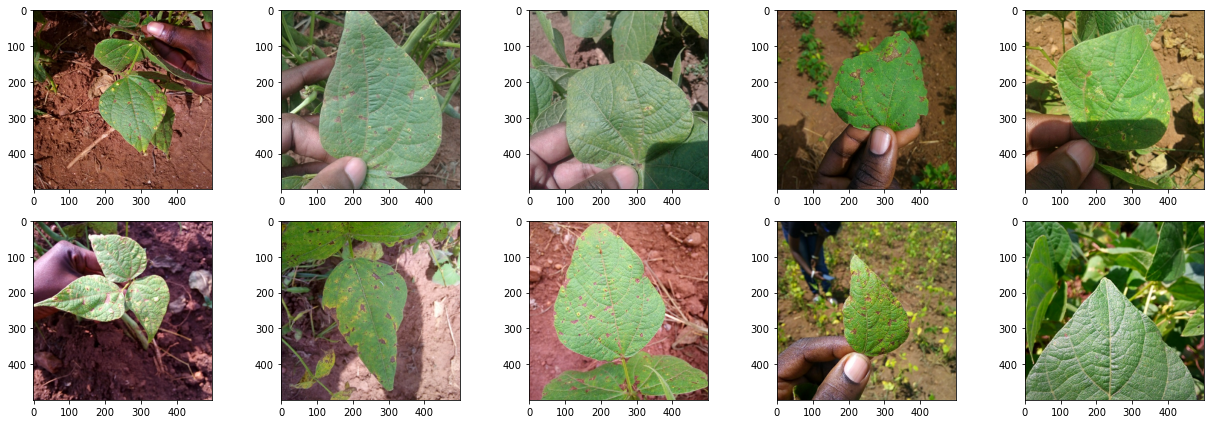

In [ ]:
plot_random_sample(train_images)

3. 	Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (архитектура сетей по вашему усмотрению). Количество эпох обучения указано в индивидуальном задании.

In [ ]:
df_train['label'].unique(), df_test['label'].unique()

(array([1, 0, 2], dtype=int64), array([0, 1, 2], dtype=int64))

In [ ]:
train_images1 = train_images[train_labels>0]
train_labels1 = train_labels[train_labels>0]
test_images1 = test_images[test_labels>0]
test_labels1 = test_labels[test_labels>0]
train_images1.shape, train_labels1.shape, test_images1.shape, test_labels1.shape

((689, 500, 500, 3), (689,), (85, 500, 500, 3), (85,))

In [ ]:
train_labels1 -= 1
test_labels1 -= 1
train_labels1, test_labels1

(array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        1., 

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(500, 500, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_images1,
    train_labels1,
    epochs=25,
    batch_size=128,
    validation_data=(test_images1, test_labels1)
)

Epoch 1/25
6/6 [==============================] - 20s 3s/step - loss: 720.9971 - accuracy: 0.4761 - val_loss: 531.6595 - val_accuracy: 0.5059
Epoch 2/25
6/6 [==============================] - 12s 2s/step - loss: 248.4584 - accuracy: 0.4993 - val_loss: 114.9475 - val_accuracy: 0.4941
Epoch 3/25
6/6 [==============================] - 5s 869ms/step - loss: 59.8773 - accuracy: 0.5559 - val_loss: 83.4042 - val_accuracy: 0.5059
Epoch 4/25
6/6 [==============================] - 4s 611ms/step - loss: 50.8826 - accuracy: 0.6313 - val_loss: 18.5425 - val_accuracy: 0.7059
Epoch 5/25
6/6 [==============================] - 4s 589ms/step - loss: 28.2598 - accuracy: 0.7199 - val_loss: 43.1026 - val_accuracy: 0.5765
Epoch 6/25
6/6 [==============================] - 4s 594ms/step - loss: 19.7539 - accuracy: 0.7547 - val_loss: 21.4153 - val_accuracy: 0.6706
Epoch 7/25
6/6 [==============================] - 4s 596ms/step - loss: 12.8221 - accuracy: 0.7765 - val_loss: 11.5524 - val_accuracy: 0.7647
Epoch 

In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(500, 500, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy'])

history_2 = model_2.fit(
    train_images1,
    train_labels1,
    steps_per_epoch=8,
    epochs=25,
    verbose=1,
    validation_data=(test_images1, test_labels1)
)

Epoch 1/25
8/8 [==============================] - 42s 5s/step - loss: 96.1210 - accuracy: 0.5414 - val_loss: 1.3937 - val_accuracy: 0.6941
Epoch 2/25
8/8 [==============================] - 37s 5s/step - loss: 3.1030 - accuracy: 0.6139 - val_loss: 0.9156 - val_accuracy: 0.6000
Epoch 3/25
8/8 [==============================] - 37s 5s/step - loss: 2.2848 - accuracy: 0.6081 - val_loss: 0.9137 - val_accuracy: 0.6471
Epoch 4/25
8/8 [==============================] - 37s 5s/step - loss: 1.9421 - accuracy: 0.6009 - val_loss: 1.0812 - val_accuracy: 0.7059
Epoch 5/25
8/8 [==============================] - 37s 5s/step - loss: 1.2440 - accuracy: 0.6792 - val_loss: 3.1381 - val_accuracy: 0.5059
Epoch 6/25
8/8 [==============================] - 38s 5s/step - loss: 1.0399 - accuracy: 0.7547 - val_loss: 0.4975 - val_accuracy: 0.8235
Epoch 7/25
8/8 [==============================] - 38s 5s/step - loss: 0.9832 - accuracy: 0.7402 - val_loss: 0.4937 - val_accuracy: 0.8235
Epoch 8/25
8/8 [=================

4. Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

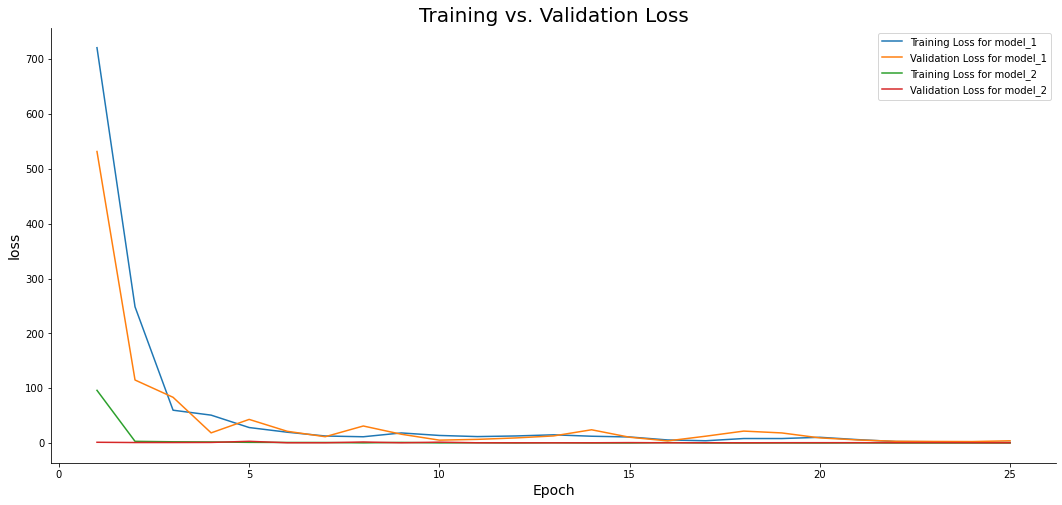

In [ ]:
plt.plot(np.arange(1, 26), history_1.history['loss'], label='Training Loss for model_1')
plt.plot(np.arange(1, 26), history_1.history['val_loss'], label='Validation Loss for model_1')
plt.plot(np.arange(1, 26), history_2.history['loss'], label='Training Loss for model_2')
plt.plot(np.arange(1, 26), history_2.history['val_loss'], label='Validation Loss for model_2')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.ylabel('loss', size=14)
plt.legend();

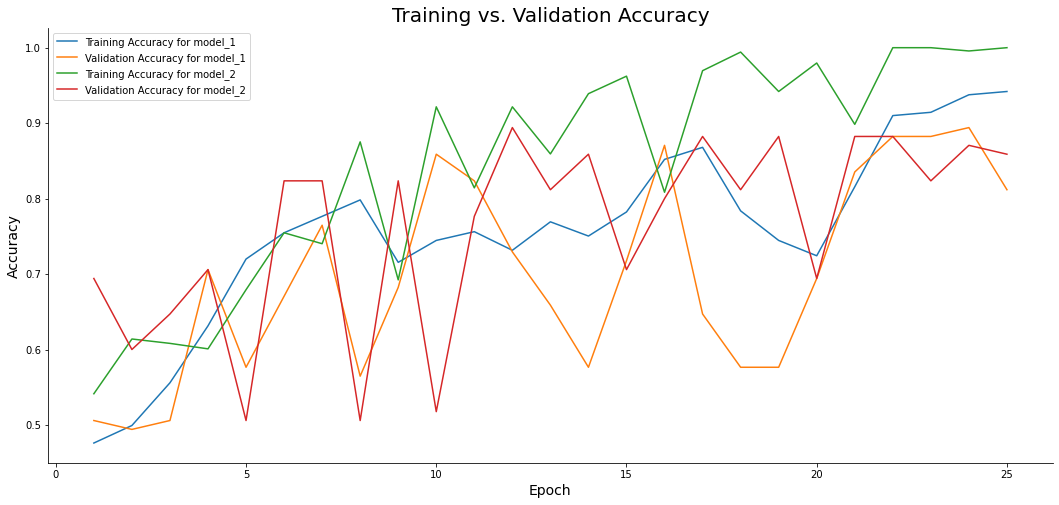

In [ ]:
plt.plot(np.arange(1, 26), history_1.history['accuracy'], label='Training Accuracy for model_1')
plt.plot(np.arange(1, 26), history_1.history['val_accuracy'], label='Validation Accuracy for model_1')
plt.plot(np.arange(1, 26), history_2.history['accuracy'], label='Training Accuracy for model_2')
plt.plot(np.arange(1, 26), history_2.history['val_accuracy'], label='Validation Accuracy for model_2')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend();

5. Сравните качество бинарной классификации нейронными сетями при помощи матрицы ошибок для тестовой выборки.

In [ ]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

In [ ]:
prediction1 = model_1.predict(test_images1)
prediction1.reshape(-1)
y_pred1 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction1)])
print(y_pred1)

[0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 1 0 0 1 0]


In [ ]:
confusion_matrix(test_labels1, y_pred1)

array([[41,  2],
       [14, 28]])

In [ ]:
prediction2 = model_2.predict(test_images1)
prediction2.reshape(-1)
y_pred2 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction2)])
print(y_pred2)

[0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0
 1 1 0 1 1 0 1 1 0 1 0]


In [ ]:
confusion_matrix(test_labels1, y_pred2)

array([[34,  9],
       [ 3, 39]])

6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

In [ ]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [ ]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)

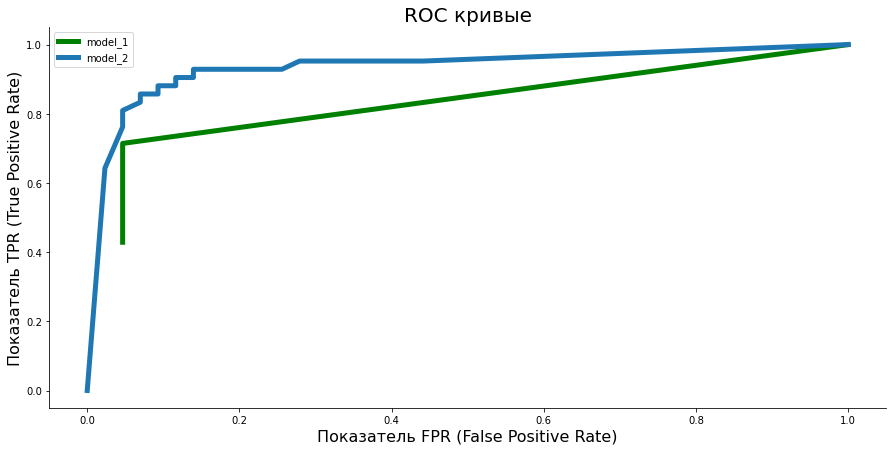

In [ ]:
plt.figure(figsize=(15,7))

ROC1 = roc_from_scratch(prediction1.reshape(-1),test_labels1)
plt.plot(ROC1[:,0],ROC1[:,1],color='g',lw=5, label='model_1')
ROC2 = roc_from_scratch(prediction2.reshape(-1),test_labels1)
plt.plot(ROC2[:,0],ROC2[:,1],lw=5, label='model_2')
plt.title('ROC кривые',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);
plt.legend()

In [ ]:
def trap(ROC): # метод трапеций
 sum = 0.5*(ROC[0,1]+ROC[len(ROC)-1, 1])
 for i in range(1, len(ROC)):
  sum += ROC[i,1]
 return sum*1/len(ROC)


In [ ]:
trap(ROC1), trap(ROC2)

(0.673738802451673, 0.8993399339933987)

7. Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (архитектура сетей по вашему усмотрению). Количество эпох обучения указано в индивидуальном задании.

In [ ]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, int(label)] = 1.
    return results

In [ ]:
train_labels = to_one_hot(train_labels)
test_labels = to_one_hot(test_labels)
train_labels.shape, test_labels.shape

((1034, 3), (128, 3))

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(500, 500, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [ ]:
model_3.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history_3 = model_3.fit(
    train_images,
    train_labels,
    epochs=25,
    verbose=1,
    validation_data=(test_images, test_labels)
)

Epoch 1/25
33/33 [==============================] - 17s 514ms/step - loss: 291.8178 - accuracy: 0.3607 - val_loss: 230.8421 - val_accuracy: 0.3281
Epoch 2/25
33/33 [==============================] - 17s 509ms/step - loss: 106.5950 - accuracy: 0.4081 - val_loss: 281.2988 - val_accuracy: 0.3359
Epoch 3/25
33/33 [==============================] - 17s 512ms/step - loss: 114.9938 - accuracy: 0.4275 - val_loss: 114.7968 - val_accuracy: 0.3672
Epoch 4/25
33/33 [==============================] - 17s 510ms/step - loss: 83.3482 - accuracy: 0.4062 - val_loss: 42.8155 - val_accuracy: 0.4375
Epoch 5/25
33/33 [==============================] - 17s 511ms/step - loss: 78.3822 - accuracy: 0.4420 - val_loss: 14.3931 - val_accuracy: 0.6406
Epoch 6/25
33/33 [==============================] - 17s 509ms/step - loss: 60.1739 - accuracy: 0.5068 - val_loss: 74.9916 - val_accuracy: 0.3594
Epoch 7/25
33/33 [==============================] - 17s 509ms/step - loss: 41.4212 - accuracy: 0.4845 - val_loss: 101.1808 -

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), input_shape=(500, 500, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), input_shape=(500, 500, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation="softmax")
])

model_4.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_4 = model_4.fit(
    train_images,
    train_labels,
    epochs=25,
    verbose=1,
    validation_split = 0.2
)

Epoch 1/25
33/33 [==============================] - 21s 230ms/step - loss: 30.8086 - accuracy: 0.3762 - val_loss: 1.0305 - val_accuracy: 0.4766
Epoch 2/25
33/33 [==============================] - 6s 175ms/step - loss: 1.0706 - accuracy: 0.5106 - val_loss: 0.9675 - val_accuracy: 0.5547
Epoch 3/25
33/33 [==============================] - 6s 176ms/step - loss: 0.9654 - accuracy: 0.6451 - val_loss: 1.0662 - val_accuracy: 0.4766
Epoch 4/25
33/33 [==============================] - 6s 177ms/step - loss: 0.7869 - accuracy: 0.7901 - val_loss: 0.8935 - val_accuracy: 0.6719
Epoch 5/25
33/33 [==============================] - 6s 190ms/step - loss: 0.4817 - accuracy: 0.8704 - val_loss: 0.8957 - val_accuracy: 0.6094
Epoch 6/25
33/33 [==============================] - 6s 180ms/step - loss: 0.2964 - accuracy: 0.9265 - val_loss: 1.2708 - val_accuracy: 0.6016
Epoch 7/25
33/33 [==============================] - 6s 186ms/step - loss: 0.2243 - accuracy: 0.9632 - val_loss: 1.5040 - val_accuracy: 0.6719
Epoc

8. Сравните качество многоклассовой классификации нейронными сетями при помощи матрицы ошибок (для трех классов) для тестовой выборки.

In [ ]:
prediction3 = model_3.predict(test_images)
prediction3

array([[9.99999404e-01, 5.57223359e-07, 3.72528834e-20],
       [1.00341635e-02, 9.89965796e-01, 3.51456392e-26],
       [1.13596858e-18, 8.40775671e-29, 1.00000000e+00],
       [4.00627094e-27, 8.51001709e-28, 1.00000000e+00],
       [9.89572767e-22, 2.98663244e-23, 1.00000000e+00],
       [1.00000000e+00, 1.49008539e-09, 1.68596106e-36],
       [2.67378334e-02, 9.73262191e-01, 4.83746935e-21],
       [9.99999881e-01, 6.97612137e-08, 1.20394661e-13],
       [1.00000000e+00, 1.64787956e-14, 4.88222733e-23],
       [9.48897898e-02, 9.05110180e-01, 2.19061770e-12],
       [1.00000000e+00, 5.63730694e-11, 1.77636055e-36],
       [4.04836209e-09, 9.99997735e-01, 2.24499422e-06],
       [7.51031876e-01, 2.48804137e-01, 1.63922508e-04],
       [1.23306059e-15, 4.52422218e-14, 1.00000000e+00],
       [9.42634821e-01, 4.31823810e-06, 5.73608801e-02],
       [8.84169459e-01, 1.15522996e-01, 3.07558890e-04],
       [2.75169254e-12, 1.00000000e+00, 0.00000000e+00],
       [2.04526056e-02, 1.26701

In [ ]:
y_pred3 = np.array([i.argmax() for i in prediction3])
y_pred3.shape

(128,)

In [ ]:
df_test['label'].to_numpy(dtype=np.float32).shape

(128,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test['label'].to_numpy(dtype=np.float32), y_pred3)

NameError: ignored

In [ ]:
prediction4 = model_4.predict(test_images)
y_pred4 = np.array([i.argmax() for i in prediction4])
y_pred4.shape

(128,)

In [ ]:
confusion_matrix(df_test['label'].to_numpy(dtype=np.float32), y_pred4)

array([[43,  0,  0],
       [43,  0,  0],
       [42,  0,  0]])

9. Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.


In [ ]:
plt.plot(np.arange(1, 26), history_3.history['loss'], label='Training Loss for model_3')
plt.plot(np.arange(1, 26), history_3.history['val_loss'], label='Validation Loss for model_3')
plt.plot(np.arange(1, 26), history_4.history['loss'], label='Training Loss for model_4')
plt.plot(np.arange(1, 26), history_4.history['val_loss'], label='Validation Loss for model_4')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.ylabel('loss', size=14)
plt.legend();

NameError: ignored

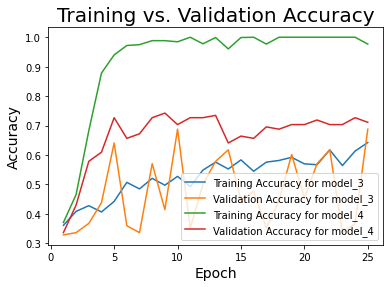

In [ ]:
plt.plot(np.arange(1, 26), history_3.history['accuracy'], label='Training Accuracy for model_3')
plt.plot(np.arange(1, 26), history_3.history['val_accuracy'], label='Validation Accuracy for model_3')
plt.plot(np.arange(1, 26), history_4.history['accuracy'], label='Training Accuracy for model_4')
plt.plot(np.arange(1, 26), history_4.history['val_accuracy'], label='Validation Accuracy for model_4')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend();